In [5]:
from pyswmm_lite import Env
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = Env("./networks/Single_AA.inp")
flow = np.sin(np.linspace(0.0, 1.0, 100)*np.pi) * 3.0 # Half sine wave
flow = np.hstack((np.zeros(10), flow, np.zeros(300)))

data = {}
data["outflow"] = [] 
data["inflow"]  = []
done = False
for time in range(0, len(flow)):
        # set the gate_position 
    env.set_gate("1", 1.0)

    env.sim._model.setNodeInflow("P1", 1*flow[time])
    env.sim._model.setNodeInflow("P2", 0.0)


        # record_data
    data["outflow"].append(env.flow("1"))
    data["inflow"].append(env.get_inflow("P1"))

        # step through simulation
    done = env.step()

In [3]:
(sum(data["outflow"]) - sum(data["inflow"]))/sum(data["inflow"])

0.12502402542415372

In [4]:
sum(data["outflow"])

219.88624280952524

In [5]:
env = Env("./networks/Single_AA.inp")
flow = np.load("Inflow_aa.npy") 

data = {}
data["outflow"] = [] 
data["inflow"]  = []
done = False
for time in range(0, len(flow)):
        # set the gate_position 
    env.set_gate("1", 1.0)

    env.sim._model.setNodeInflow("P1", 1*flow[time])
    env.sim._model.setNodeInflow("P2", 0.0)


        # record_data
    data["outflow"].append(env.flow("7"))
    data["inflow"].append(env.get_inflow("P1"))

        # step through simulation
    done = env.step()
env.terminate()

In [6]:
(sum(data["outflow"]) - sum(data["inflow"]))/sum(data["inflow"])

0.003283671394419432

In [7]:
sum(data["outflow"])

275519.18975336576

In [8]:
sum(data["inflow"])

274617.4363332694

In [13]:
env = Env("./networks/Single_AA.inp")

data = {}
data["outflow"] = [] 
data["inflow"]  = []
done = False
while not done:
        # set the gate_position 
    env.set_gate("1", 0.5)
        # record_data
    data["outflow"].append(env.flow("7"))
    data["inflow"].append(env.get_inflow("P1"))

        # step through simulation
    done = env.step()
env.terminate()

In [14]:
(sum(data["outflow"]) - sum(data["inflow"]))/sum(data["inflow"])

-0.00026420741055379016

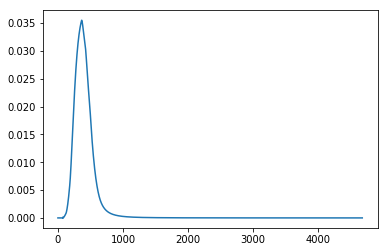

In [15]:
plt.plot(data["outflow"])

In [16]:
sum(data["inflow"]) - sum(data["outflow"])

0.0026773862222118083